In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.color import label2rgb
from skimage import measure
from matplotlib.patches import Rectangle

In [2]:
image_filename = "images/soil-002.jpg"
figsize = (38,24)

In [3]:
def show_image(img, cmap="gray"):
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img, cmap=cmap)
    return fig,ax

(<Figure size 2736x1728 with 1 Axes>, <AxesSubplot:>)

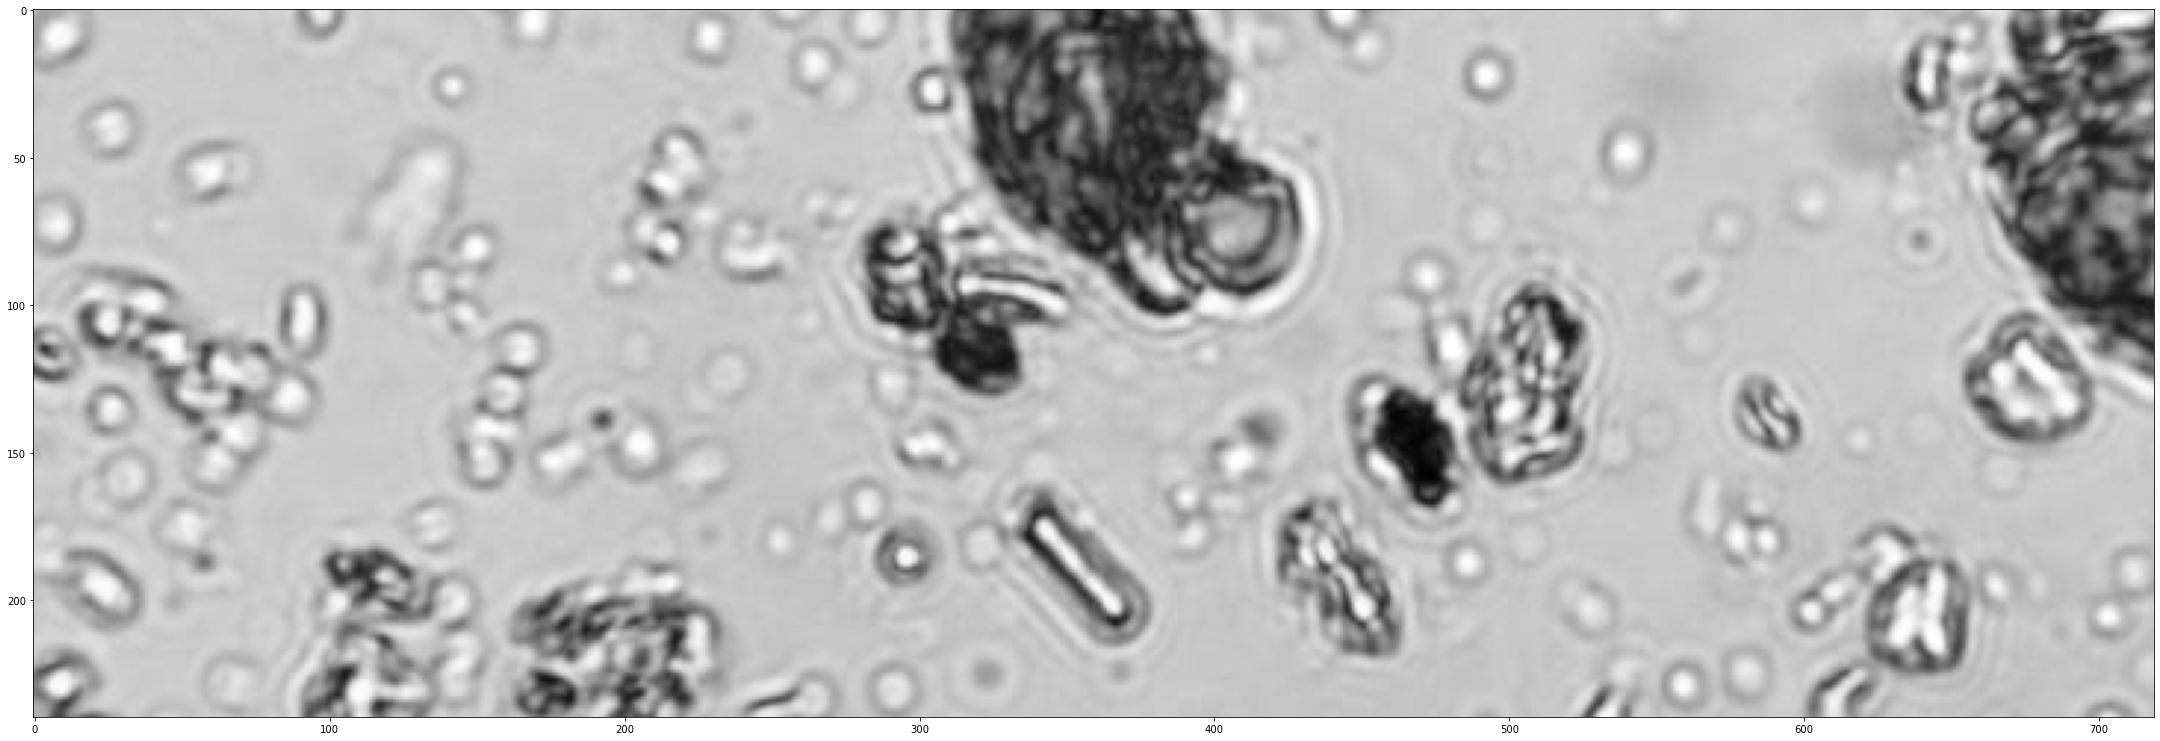

In [4]:
img = cv2.imread(image_filename, 0)
eq_img = cv2.equalizeHist(img)

show_image(img)

(<Figure size 2736x1728 with 1 Axes>, <AxesSubplot:>)

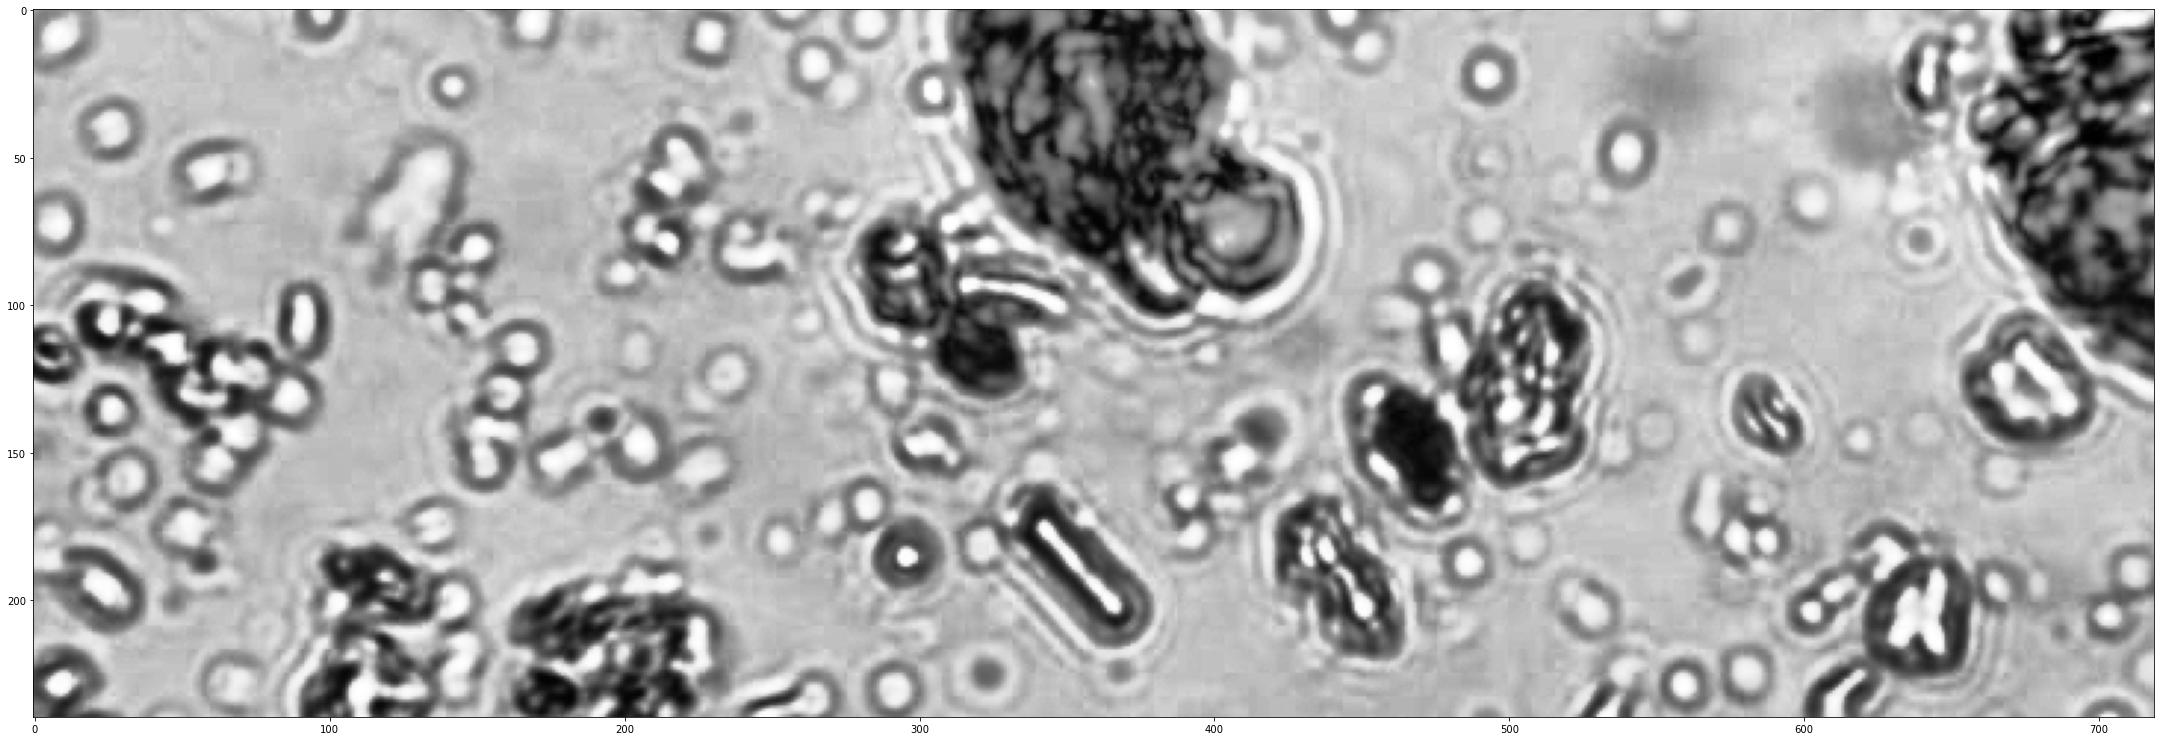

In [5]:
clahe = cv2.createCLAHE(clipLimit=3)
cl_img = clahe.apply(img)

show_image(cl_img)

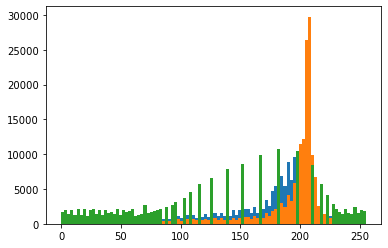

In [6]:
plt.hist(cl_img.flat, bins=100, range=(0,255))
plt.hist(img.flat, bins=100, range=(0,255))
plt.hist(eq_img.flat, bins=100, range=(0,255))
plt.show()

(<Figure size 2736x1728 with 1 Axes>, <AxesSubplot:>)

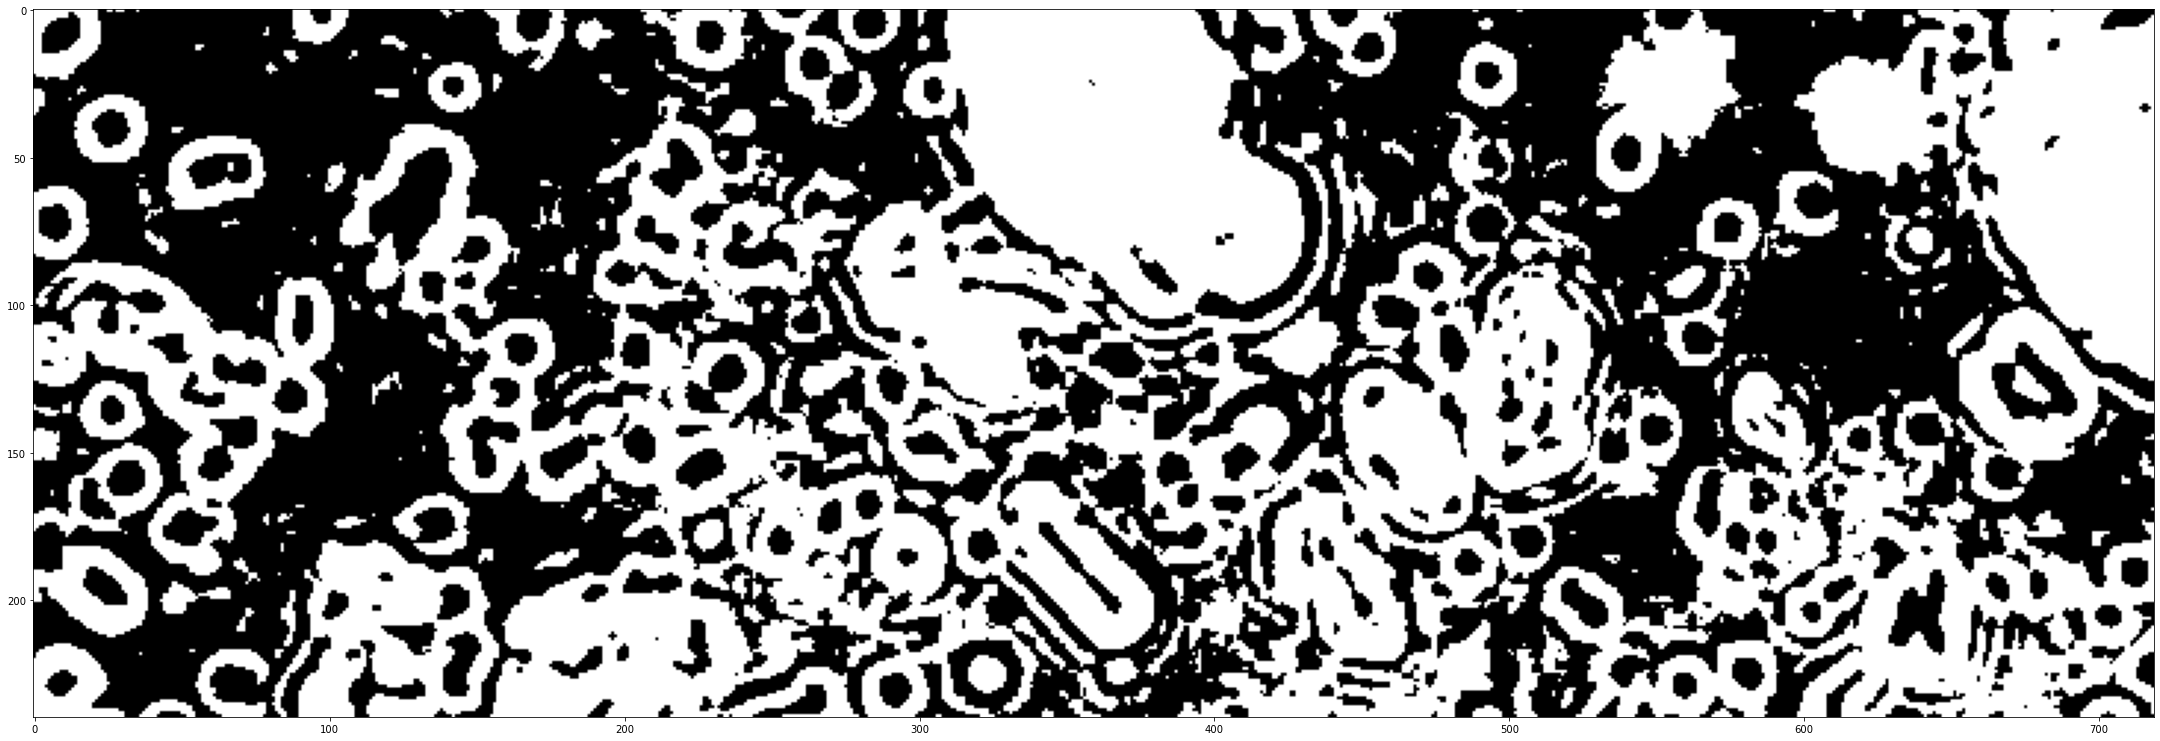

In [7]:
ret, thresh = cv2.threshold(eq_img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
show_image(thresh)

(<Figure size 2736x1728 with 1 Axes>, <AxesSubplot:>)

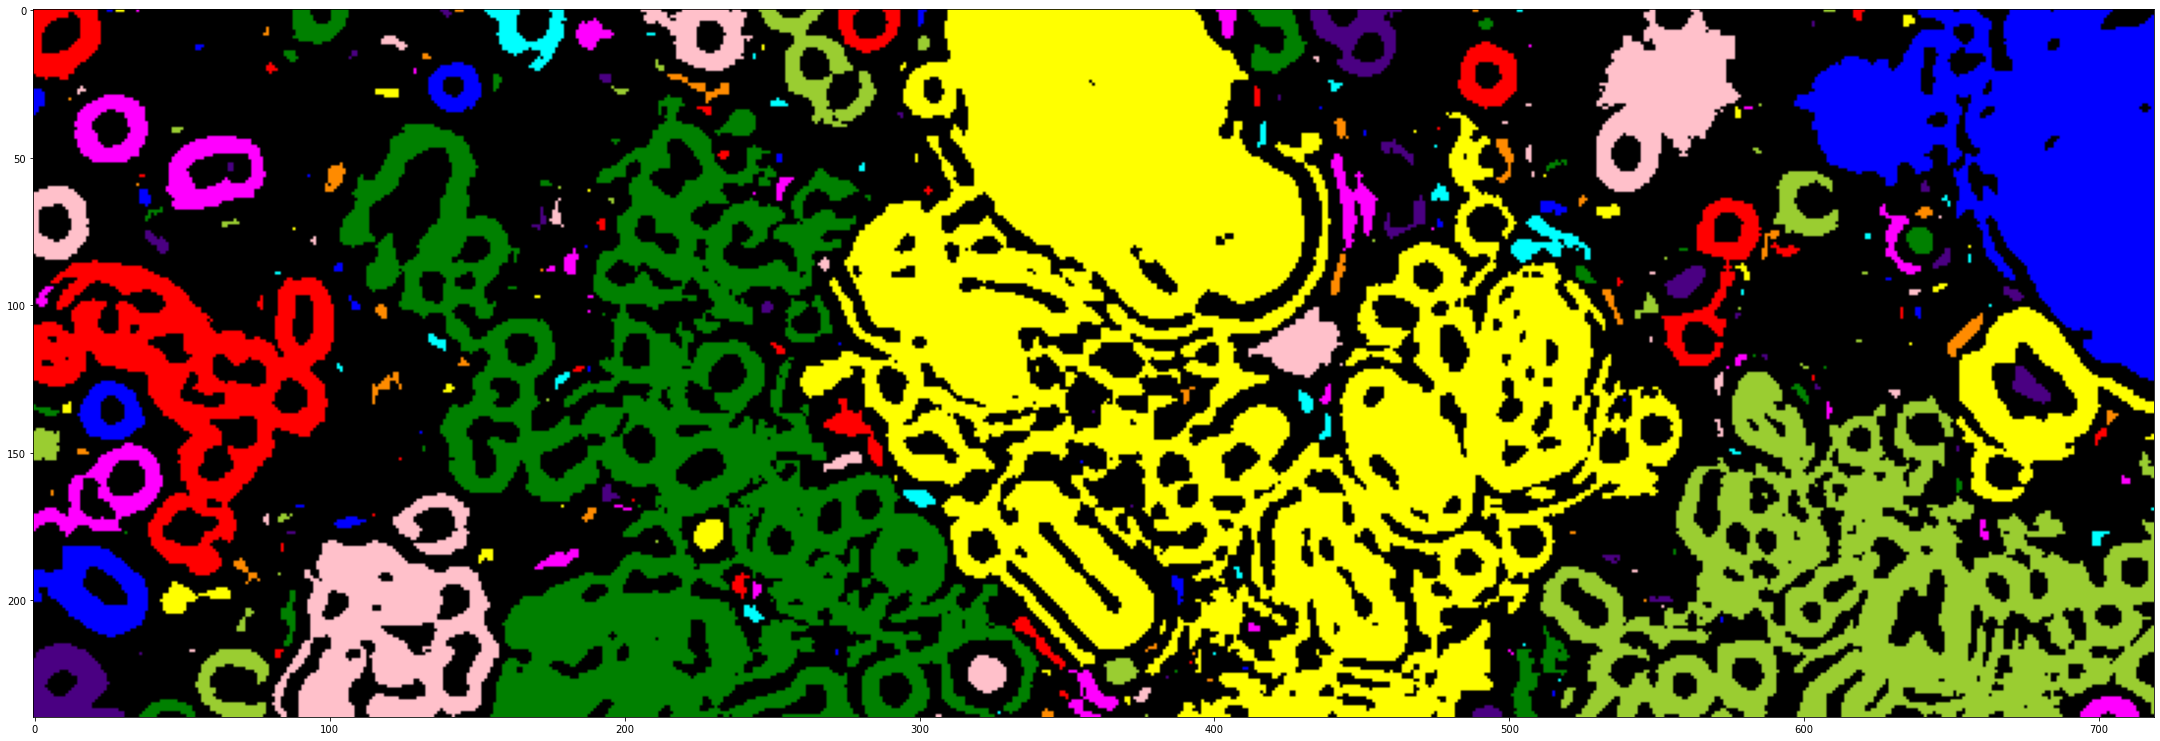

In [8]:
label_image = measure.label(thresh, connectivity=img.ndim)
label_image_overlay = label2rgb(label_image)
show_image(label_image_overlay, cmap='viridis')

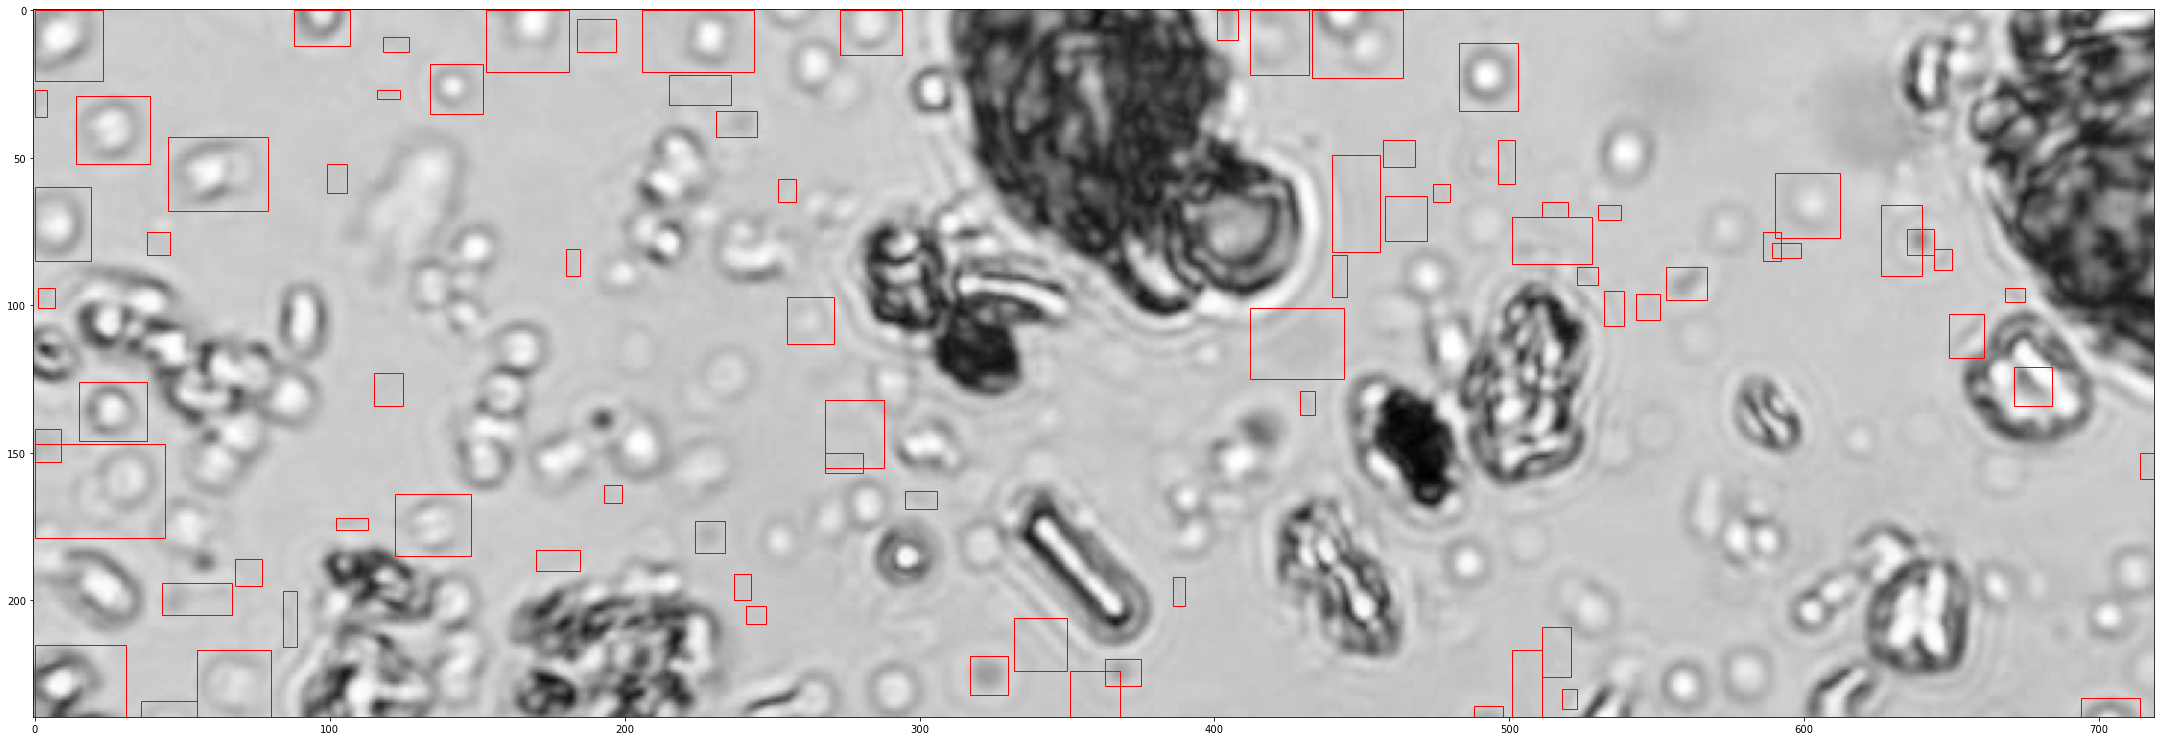

In [9]:
cells = measure.regionprops(label_image)
fig, ax = plt.subplots(figsize=figsize)
ax.imshow(img, cmap="gray")
for cell in cells:
    (min_row, min_col, max_row, max_col) = cell.bbox
    if(cell.area > 20 and cell.area < 500):
        (x, y, w, h) = (min_col, min_row, max_col - min_col, max_row - min_row)
        ax.add_patch(Rectangle((x, y), w, h, fill=False, edgecolor="red"))
plt.show()